<a href="https://colab.research.google.com/github/cemvardar/bottle_heroku_hello/blob/master/Markdown_pricing_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Season End Markdown Pricing

Season end markdown pricing is a common problem in fast moving consumer goods and fashion industry. As the high season for a product category ends the retialers wnat to sell thru inventory quickly to open space for new season's items on their shelves. 

We'll go through a toy example in this lesson to understand

- basic tradeoffs in a markdown pricing problem
- how to code simple simulations to optimize and visualize this tradeoff

##Problem 

Assume that a retailer has an item with 300 units of inventory and have 6 weeks of the season remaining. At the end of the system the remaining items will be discarded at $0 cost. 

Further assume that the weekly price-quantity relationship can be modeled with the equation 
##$$Q = e^{c-\beta * price}$$ 

where $\beta=0.025$ and c = 5

which comes to 

##$$Q = e^{5-0.025 * price}$$

What should be the price of this product in the following 6 weeks to maximize earnings of this retailer?

In [38]:
import pandas as pd
import numpy as np
import math

In [12]:
beta = 0.025
c = 5

def get_quantity(price):
    return math.exp(c - beta * price)

quantity_list = []
for i in range(1, 11):
    price = i*10
    quantity_list.append({'price':price, 'quantity': get_quantity(price)})

df_quantity = pd.DataFrame(quantity_list)

Text(0.5, 1.0, 'price quantity curve')

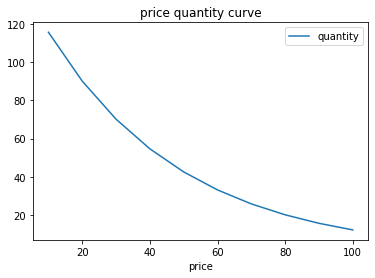

In [13]:
axes = df_quantity.plot(x ='price', y='quantity')
axes.set_title('price quantity curve')

In [14]:
starting_inventory = 300
number_of_week_left = 6
current_price = 80

In [35]:
def get_scenario_results(starting_inventory, price):
    current_revenue = 0
    current_price = price
    current_inventory = starting_inventory
    scenario_results_details = []
    for current_week in range(1, number_of_week_left+1):
        current_quantity = get_quantity(current_price)
        sales = min(current_inventory, current_quantity)
        current_inventory = current_inventory - sales
        current_revenue = current_revenue + sales * current_price
        scenario_results_details.append({'week':current_week, 'sales' :sales, 'price': current_price, 'revenue' : current_revenue, 
        'inventory' :current_inventory})
    scenario_results_details_df = pd.DataFrame(scenario_results_details)
    scenario_result_summary = {'total_revenue': current_revenue, 
                               'final_inventory':current_inventory,
                               'average_price':scenario_results_details_df['price'].mean()}
    return scenario_result_summary, scenario_results_details_df

summary_result, detail_df = get_scenario_results(300, 43.5)

In [36]:
detail_df

,week,sales,price,revenue,inventory
0,1,50.023855,43.5,2176.037711,249.976145
1,2,50.023855,43.5,4352.075421,199.952289
2,3,50.023855,43.5,6528.113132,149.928434
3,4,50.023855,43.5,8704.150843,99.904578
4,5,50.023855,43.5,10880.188553,49.880723
5,6,49.880723,43.5,13050.000000,0.000000


In [44]:
scenario_results = []
for scenario_price in np.arange(0,100, 0.1):
    summary_result, detail_df = get_scenario_results(300, scenario_price)
    scenario_results.append(summary_result)

df_scenarios = pd.DataFrame(scenario_results)
# df_scenarios

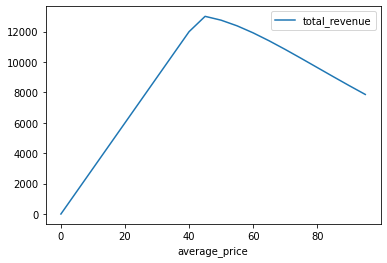

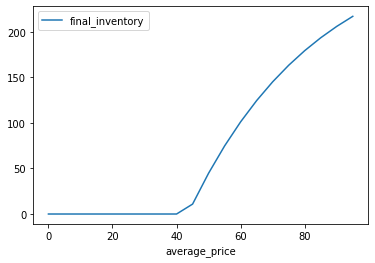

In [43]:
df_scenarios.plot(x ='average_price', y=['total_revenue'])
df_scenarios.plot(x ='average_price', y=['final_inventory'])
